<a href="https://colab.research.google.com/github/KHLLS/Tugas-EDA/blob/main/processing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [288]:
# Mengimport data set

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/raw_weatherAUS.csv") # isi tergantung lokasi file datasetnua
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [290]:
# menghitung missing value sebelum membersihkan data

missing_value = df.isna().sum()
missing_percentage = (missing_value / len(df)) * 100

df_missing_value = pd.DataFrame({'Missing Value':missing_value,'Missing Percentage %':missing_percentage})
df_missing_value

,Missing Value,Missing Percentage %
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


In [291]:
# Drop Column Yang Memiliki 35%+ missing value

df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis = 1,inplace=True)

In [292]:
# Mengubah tipe data dan menjadikan bulan

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.drop('Date', axis=1, inplace=True)

In [293]:
# Menghapus baris yg tidak memiliki isi RainTomorrow

df.dropna(subset=['RainTomorrow'], inplace=True)

In [294]:
# Mengisi nilai kosong

numeric = df.select_dtypes(include=np.number).columns
category = df.select_dtypes(exclude=np.number).columns

for col in numeric:
  df[col] = df[col].fillna(df[col].median())

for col in category:
  df[col] = df[col].fillna(df[col].mode()[0])


In [295]:
# Menghitung missing value setelah membersihkan data

missing_value_2 = df.isna().sum()
missing_percentage_2 = (missing_value_2 / len(df)) * 100

df_missing_value_2 = pd.DataFrame({'Missing Value':missing_value_2,'Missing Percentage %':missing_percentage_2})
df_missing_value_2

,Missing Value,Missing Percentage %
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,0,0.0
WindSpeed3pm,0,0.0


In [296]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


In [297]:
category_2 = df.select_dtypes(exclude=np.number).columns

for col in category_2:
  print(f'{col}: {df[col].unique()}')

Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday: ['No' 'Yes']
RainTomorrow: ['No' 'Yes']


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-null  ob

In [299]:
df["Location"] = df["Location"].str.replace("Airport","")

In [300]:
category_3 = df.select_dtypes(exclude=np.number).columns

for col in category_3:
  print(f'{col}: {df[col].unique()}')

Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'WaggaWagga'
 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong' 'MountGinini'
 'Ballarat' 'Bendigo' 'Sale' 'Melbourne' 'Mildura' 'Nhil' 'Portland'
 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns' 'GoldCoast' 'Townsville'
 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera' 'Albany' 'Witchcliffe'
 'PearceRAAF' 'Perth' 'SalmonGums' 'Walpole' 'Hobart' 'Launceston'
 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']
WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday: ['No' 'Yes']
RainTomorrow: ['No' 'Yes']


In [301]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,6
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,6


In [302]:
# Menyimpan Data Untuk Vosualisasi

df.to_csv("clean_weatherAUS.csv", index=False)

# Memproses Data Untuk Keperluan Machine Learning

In [303]:
# Mengatasi nilai outliar ke nilai standard di masing" kolom numeric menggunakan logaritma

kolom_num = df.select_dtypes(include=np.number).columns
for col in kolom_num:
  print(f'{col}: {df[col].max()}')
  mean = df[col].mean()
  std = df[col].std()
  z_score = (df[col].max() - mean) / std
  print(f"Z-Score Before Log: {z_score:.2f}")
  if z_score > 5:
    df[col] = np.log1p(df[col])
    mean_new = df[col].mean()
    std_new = df[col].std()
    z_score = (df[col].max() - mean_new) / std_new
  print(f"Z-Score After: {z_score:.2f}")

MinTemp: 33.9
Z-Score Before Log: 3.40
Z-Score After: 3.40
MaxTemp: 48.1
Z-Score Before Log: 3.50
Z-Score After: 3.50
Rainfall: 371.0
Z-Score Before Log: 43.75
Z-Score After: 6.03
WindGustSpeed: 135.0
Z-Score Before Log: 7.24
Z-Score After: 3.88
WindSpeed9am: 130.0
Z-Score Before Log: 13.11
Z-Score After: 2.89
WindSpeed3pm: 87.0
Z-Score Before Log: 7.84
Z-Score After: 2.99
Humidity9am: 100.0
Z-Score Before Log: 1.64
Z-Score After: 1.64
Humidity3pm: 100.0
Z-Score Before Log: 2.36
Z-Score After: 2.36
Pressure9am: 1041.0
Z-Score Before Log: 3.46
Z-Score After: 3.46
Pressure3pm: 1039.6
Z-Score Before Log: 3.64
Z-Score After: 3.64
Temp9am: 40.2
Z-Score Before Log: 3.59
Z-Score After: 3.59
Temp3pm: 46.7
Z-Score Before Log: 3.64
Z-Score After: 3.64
Month: 12
Z-Score Before Log: 1.63
Z-Score After: 1.63


In [304]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.470004,W,3.806662,W,WNW,3.044522,3.218876,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.000000,WNW,3.806662,NNW,WSW,1.609438,3.135494,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.000000,WSW,3.850148,W,WSW,2.995732,3.295837,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.000000,NE,3.218876,SE,E,2.484907,2.302585,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,0.693147,W,3.737670,ENE,NW,2.079442,3.044522,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.000000,E,3.465736,ESE,E,2.772589,2.639057,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,6
145455,Uluru,2.8,23.4,0.000000,E,3.465736,SE,ENE,2.639057,2.484907,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.000000,NNW,3.135494,SE,N,2.639057,2.302585,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.000000,N,3.637586,SE,WNW,2.302585,2.302585,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,6


In [305]:
# Menghitung Jumlah Hari Besok Hujan Dan Tidak Hujan

rain_total = df['RainTomorrow'].value_counts()
rain_total

,count
RainTomorrow,
No,110316
Yes,31877


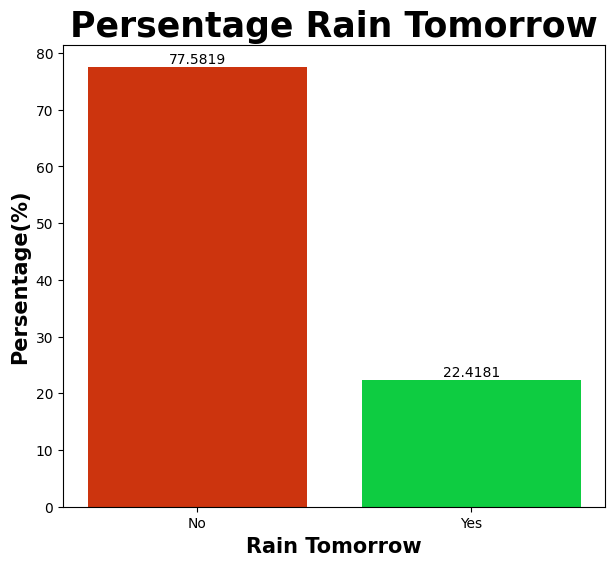

In [306]:
# Menghitung Berapa persen besok hujan dan tidak hujan

persen = rain_total / len(df) * 100
plt.figure(figsize=(7, 6))
bar = plt.bar(persen.index, persen.values, color=['#cc340e','#0ecc41'])
plt.bar_label(bar)
plt.xlabel('Rain Tomorrow',fontsize=15,fontweight='bold')
plt.ylabel('Persentage(%)',fontsize=15,fontweight='bold')
plt.title('Persentage Rain Tomorrow',fontsize=25,fontweight='bold')
plt.show()

In [307]:
# Mengubah nilai kolom agar bisa dibaca komputer
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  int64  
 17  RainTomorrow   142193 non-null  in

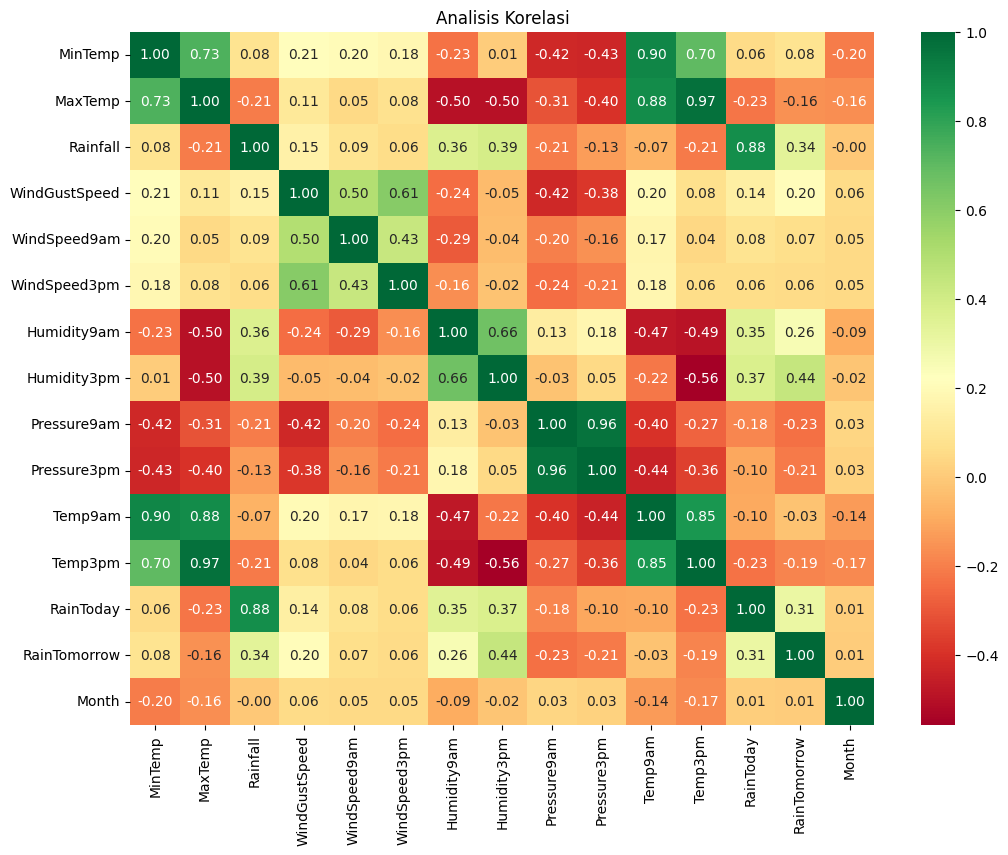

In [309]:
def heatmap(data):
  plt.figure(figsize=(12, 9))
  sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='RdYlGn', fmt='.2f')
  plt.title("Analisis Korelasi")
  plt.show()

heatmap(df)

In [310]:
# Mencari Kolom Yang Korelasinya tinggi

corr = df.corr(numeric_only=True)
get_value = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = []
for col in get_value:
  if get_value[col].any() >= 0.89:
    high_corr.append(col)
high_corr

high_corr_pairs = get_value.unstack().dropna().sort_values(ascending=False)
print("Pasangan Fitur dengan Korelasi > 0.9:")
print(high_corr_pairs[high_corr_pairs >= 0.89])

Pasangan Fitur dengan Korelasi > 0.9:
Temp3pm      MaxTemp        0.969297
Pressure3pm  Pressure9am    0.959879
Temp9am      MinTemp        0.898129
dtype: float64


In [311]:
# Menghapus kolom yang memiliki kesamaan dengan kolom yang mirip dan memiliki korelasi yang lebih rendah dari kolom yang mirip

df.drop(columns=['Temp3pm', 'Temp9am', 'Pressure9am'], inplace=True)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure3pm    142193 non-null  float64
 13  RainToday      142193 non-null  int64  
 14  RainTomorrow   142193 non-null  int64  
 15  Month          142193 non-null  int32  
dtypes: float64(9), int32(1), int64(2), object(4)
memory usage: 17.9+ MB


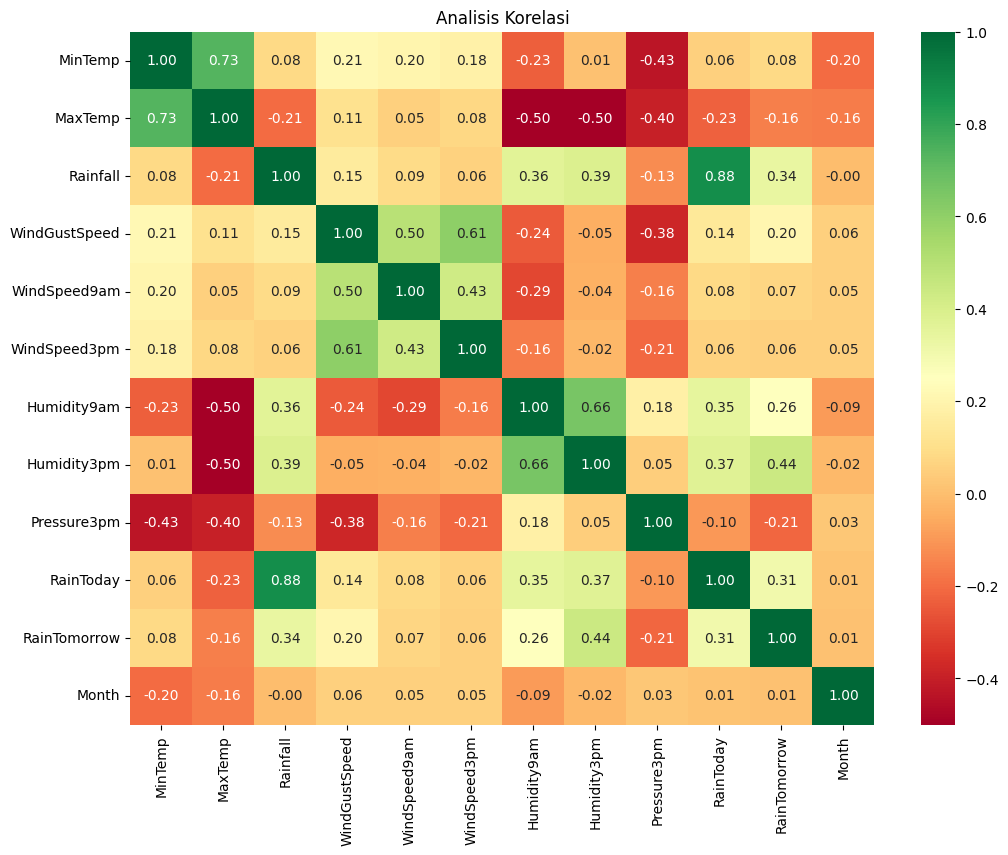

In [313]:
heatmap(df)

In [314]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.470004,W,3.806662,W,WNW,3.044522,3.218876,71.0,22.0,1007.1,0,0,12
1,Albury,7.4,25.1,0.000000,WNW,3.806662,NNW,WSW,1.609438,3.135494,44.0,25.0,1007.8,0,0,12
2,Albury,12.9,25.7,0.000000,WSW,3.850148,W,WSW,2.995732,3.295837,38.0,30.0,1008.7,0,0,12
3,Albury,9.2,28.0,0.000000,NE,3.218876,SE,E,2.484907,2.302585,45.0,16.0,1012.8,0,0,12
4,Albury,17.5,32.3,0.693147,W,3.737670,ENE,NW,2.079442,3.044522,82.0,33.0,1006.0,0,0,12


In [315]:
df_dummies = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am','WindDir3pm'], drop_first=True,dtype=int)

In [316]:
df_dummies.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,Albury,13.4,22.9,0.470004,3.806662,3.044522,3.218876,71.0,22.0,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,Albury,7.4,25.1,0.000000,3.806662,1.609438,3.135494,44.0,25.0,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,Albury,12.9,25.7,0.000000,3.850148,2.995732,3.295837,38.0,30.0,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,Albury,9.2,28.0,0.000000,3.218876,2.484907,2.302585,45.0,16.0,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,Albury,17.5,32.3,0.693147,3.737670,2.079442,3.044522,82.0,33.0,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [317]:
df_dummies['Location'] = le.fit_transform(df_dummies['Location'])

In [318]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 58 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         142193 non-null  int64  
 1   MinTemp          142193 non-null  float64
 2   MaxTemp          142193 non-null  float64
 3   Rainfall         142193 non-null  float64
 4   WindGustSpeed    142193 non-null  float64
 5   WindSpeed9am     142193 non-null  float64
 6   WindSpeed3pm     142193 non-null  float64
 7   Humidity9am      142193 non-null  float64
 8   Humidity3pm      142193 non-null  float64
 9   Pressure3pm      142193 non-null  float64
 10  RainToday        142193 non-null  int64  
 11  RainTomorrow     142193 non-null  int64  
 12  Month            142193 non-null  int32  
 13  WindGustDir_ENE  142193 non-null  int64  
 14  WindGustDir_ESE  142193 non-null  int64  
 15  WindGustDir_N    142193 non-null  int64  
 16  WindGustDir_NE   142193 non-null  int64  
 

In [319]:
save = df_dummies.to_csv("for_trained_weatherAUS.csv", index=False)
save